In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("seasonStats.csv")
df = df.loc[df["AVGFGM3"] > 0]

In [6]:
# X = df[["RATDR", "RATTO"]].to_numpy()
# #X = StandardScaler().fit_transform(X)
# y = df[["GamesWon"]].to_numpy()
# y = y.ravel()
# reg = LassoCV()
# reg.fit(X,y)

# y_pred = reg.predict(X)
# mean_squared_error(y, y_pred, squared=True)

In [3]:
# All of the stats we have data for
# statsToMeasure = ["Score", "FGM", "FGA", "FGM3", "FGA3", "FTM", "FTA", "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF"]
# statsToMeasure = ["FGM", "FGA", "FGM3", "FGA3", "FTM", "FTA", "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF"]
# statsToMeasure = ["FGA", "FGA3", "FTA", "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF"]
statsToMeasure = ["OR", "DR", "Ast", "TO", "Stl", "Blk", "PF"]

# All of the average stats
averageStats = ["AVG" + stat for stat in statsToMeasure]

# All of opponent average stats
oAverageStats = ["O" + stat for stat in averageStats]

# All of the ratio stats
ratStats = ["RAT" + stat for stat in statsToMeasure]

# All stats
allStats = averageStats + oAverageStats + ratStats

# Get win and rat dat from data frame
seasonRatDat = df.loc[:, ratStats]
seasonWinDat = df.loc[:, "GamesWon"]

In [5]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

# Create instances of the models for training
models = [
    LinearRegression(),
    LassoCV(),
    RidgeCV(),
    ElasticNetCV()
]

# Keep track of model names for later use
modelNames = [
    "LinearRegression",
    "Lasso",
    "Ridge",
    "ElasticNet"
]



# Get the seasons
seasons = df["Season"].unique()


# Make an empty data frame to hold results
featuresChosenData = pd.DataFrame(columns=["Season", "Method", "Features", "NumFeatures", "F/B"])

forwardBackward = ["forward", "backward"]


# Loop Through Every Model
for i, model in enumerate(models):
    print(i)
    # Do Forward And Backward
    for direction in forwardBackward:
        # Loop Through all numFeatures
        for num in range(1, len(ratStats)):
            # Loop Through every season
            for season in seasons:

                # Get current Season rat and win dat
                currSeasonRatDat = df.loc[df["Season"] == season, ratStats]
                currSeasonWinDat = df.loc[df["Season"] == season, "GamesWon"]

                # Sequential selection 
                selector = SequentialFeatureSelector(estimator = model,
                                                 n_features_to_select=num,
                                                 direction=direction)

                # Get important features
                selector.fit(currSeasonRatDat, currSeasonWinDat)

                # Create new Row entry
                data = {}
                data["Season"] = season
                data["Method"] = modelNames[i]
                data["Features"] = selector.get_feature_names_out()
                data["NumFeatures"] = num
                data["F/B"] = direction

                # Add new row entry
                featuresChosenData.loc[len(featuresChosenData)] = data
featuresChosenData.to_csv("./featuresChosenDataNoScoreNoMakesNoAttempts.csv")

0
1
2
3


In [6]:
featuresChosenData.loc[(featuresChosenData["Method"] == "ElasticNet")
                       & (featuresChosenData["NumFeatures"] == 5)
                       & (featuresChosenData["F/B"] == "backward")
                      ]

Season      Method                               Features  NumFeatures  \
966    2003  ElasticNet  [RATDR, RATAst, RATTO, RATStl, RATPF]            5   
967    2004  ElasticNet  [RATDR, RATAst, RATTO, RATBlk, RATPF]            5   
968    2005  ElasticNet  [RATDR, RATAst, RATTO, RATStl, RATPF]            5   
969    2006  ElasticNet  [RATDR, RATAst, RATTO, RATStl, RATPF]            5   
970    2007  ElasticNet   [RATOR, RATDR, RATAst, RATTO, RATPF]            5   
971    2008  ElasticNet  [RATDR, RATAst, RATTO, RATStl, RATPF]            5   
972    2009  ElasticNet  [RATDR, RATAst, RATTO, RATBlk, RATPF]            5   
973    2010  ElasticNet  [RATDR, RATAst, RATTO, RATStl, RATPF]            5   
974    2011  ElasticNet  [RATDR, RATAst, RATTO, RATBlk, RATPF]            5   
975    2012  ElasticNet  [RATDR, RATAst, RATTO, RATStl, RATPF]            5   
976    2013  ElasticNet  [RATDR, RATAst, RATTO, RATBlk, RATPF]            5   
977    2014  ElasticNet  [RATDR, RATAst, RATTO, RATStl, RATPF]            5   
978    2015  ElasticNet  [RATDR, RATAst, RATTO, RATStl, RATPF]            5   
979    2016  ElasticNet  [RATDR, RATAst, RATTO, RATBlk, RATPF]            5   
980    2017  ElasticNet  [RATDR, RATAst, RATTO, RATStl, RATPF]            5   
981    2018  ElasticNet  [RATDR, RATAst, RATTO, RATStl, RATPF]            5   
982    2019  ElasticNet  [RATDR, RATAst, RATTO, RATStl, RATPF]            5   
983    2020  ElasticNet  [RATDR, RATAst, RATTO, RATBlk, RATPF]            5   
984    2021  ElasticNet  [RATOR, RATDR, RATAst, RATTO, RATStl]            5   
985    2022  ElasticNet  [RATDR, RATAst, RATTO, RATStl, RATPF]            5   
986    2023  ElasticNet   [RATOR, RATDR, RATAst, RATTO, RATPF]            5   

          F/B  
966  backward  
967  backward  
968  backward  
969  backward  
970  backward  
971  backward  
972  backward  
973  backward  
974  backward  
975  backward  
976  backward  
977  backward  
978  backward  
979  backward  
980  backward  
981  backward  
982  backward  
983  backward  
984  backward  
985  backward  
986  backward

In [7]:
mse = np.zeros(len(featuresChosenData))
for i, row in featuresChosenData.iterrows():
    features = row["Features"]
    season = row["Season"]
    currSeasonWinDat = df.loc[df["Season"] == season, "GamesWon"]
    currSeasonRatDat = df.loc[df["Season"] == season, ratStats]
    if (row["Method"] == "LinearRegression"):
        reg = LinearRegression()
    elif (row["Method"] == "Lasso"):
        reg = LassoCV()
    elif (row["Method"] == "Ridge"):
        reg = RidgeCV()
    elif (row["Method"] == "ElasticNet"):
        reg = ElasticNetCV()
    
    reg.fit(currSeasonRatDat[features], currSeasonWinDat)
    winPred = reg.predict(currSeasonRatDat[features])
    mse[i] = mean_squared_error(y_pred=winPred, y_true=currSeasonWinDat)

In [8]:
featuresChosenData["MSE"] = mse
featuresChosenData.to_csv("./featuresChosenDataNoScoreNoMakesNoAttemptsWithMSE.csv")

In [9]:
featuresChosenData.loc[(featuresChosenData["Method"] == "ElasticNet")
                       & (featuresChosenData["F/B"] == "backward")
                       & (featuresChosenData["Season"] == 2006)
                      ]

Season      Method                                      Features  \
885    2006  ElasticNet                                       [RATDR]   
906    2006  ElasticNet                                [RATDR, RATTO]   
927    2006  ElasticNet                        [RATDR, RATAst, RATTO]   
948    2006  ElasticNet                 [RATDR, RATAst, RATTO, RATPF]   
969    2006  ElasticNet         [RATDR, RATAst, RATTO, RATStl, RATPF]   
990    2006  ElasticNet  [RATOR, RATDR, RATAst, RATTO, RATStl, RATPF]   

     NumFeatures       F/B        MSE  
885            1  backward  23.926995  
906            2  backward   6.220252  
927            3  backward   5.970069  
948            4  backward   5.760905  
969            5  backward   5.697933  
990            6  backward   5.647278

In [4]:
import ast
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
import pandas as pd

statsToMeasure = ["Score", "FGM", "FGA", "FGM3", "FGA3", "FTM", "FTA", "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF"]
ratStats = ["RAT" + stat for stat in statsToMeasure]

featuresCoeffsScore = pd.read_csv("./featuresChosenDataWithMSE.csv")

for stat in ratStats:
    featuresCoeffsScore[stat] = 0.0

mse = np.zeros(len(featuresCoeffsScore))

for i, row in featuresCoeffsScore.iterrows():
    features = ast.literal_eval(row["Features"].replace(" ", ","))
    season = row["Season"]
    
    currSeasonWinDat = df.loc[df["Season"] == season, "GamesWon"]
    currSeasonRatDat = df.loc[df["Season"] == season, ratStats]
    
    if (row["Method"] == "LinearRegression"):
        reg = LinearRegression()
    elif (row["Method"] == "Lasso"):
        reg = LassoCV()
    elif (row["Method"] == "Ridge"):
        reg = RidgeCV()
    elif (row["Method"] == "ElasticNet"):
        reg = ElasticNetCV()
    
    reg.fit(currSeasonRatDat[features], currSeasonWinDat)
    winPred = reg.predict(currSeasonRatDat[features])
    mse[i] = mean_squared_error(y_pred=winPred, y_true=currSeasonWinDat)
    
    for statName, coeffValue in zip(reg.feature_names_in_, reg.coef_):
        featuresCoeffsScore.at[i, statName] = coeffValue
featuresCoeffsScore.to_csv("./featuresCoeffsScore.csv")

In [7]:
featuresCoeffsScore.head()

Unnamed: 0  Season            Method      Features  NumFeatures      F/B  \
0           0    2003  LinearRegression  ['RATScore']            1  forward   
1           1    2004  LinearRegression  ['RATScore']            1  forward   
2           2    2005  LinearRegression  ['RATScore']            1  forward   
3           3    2006  LinearRegression  ['RATScore']            1  forward   
4           4    2007  LinearRegression  ['RATScore']            1  forward   

        MSE   RATScore  RATFGM  RATFGA  ...  RATFGA3  RATFTM  RATFTA  RATOR  \
0  3.972585  57.662608     0.0     0.0  ...      0.0     0.0     0.0    0.0   
1  4.147095  56.884303     0.0     0.0  ...      0.0     0.0     0.0    0.0   
2  4.087576  56.527443     0.0     0.0  ...      0.0     0.0     0.0    0.0   
3  4.235127  58.351611     0.0     0.0  ...      0.0     0.0     0.0    0.0   
4  4.643183  58.188008     0.0     0.0  ...      0.0     0.0     0.0    0.0   

   RATDR  RATAst  RATTO  RATStl  RATBlk  RATPF  
0    0.0     0.0    0.0     0.0     0.0    0.0  
1    0.0     0.0    0.0     0.0     0.0    0.0  
2    0.0     0.0    0.0     0.0     0.0    0.0  
3    0.0     0.0    0.0     0.0     0.0    0.0  
4    0.0     0.0    0.0     0.0     0.0    0.0  

[5 rows x 21 columns]

In [8]:
statsToMeasure = ["FGM", "FGA", "FGM3", "FGA3", "FTM", "FTA", "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF"]
ratStats = ["RAT" + stat for stat in statsToMeasure]

featuresCoeffsNoScore = pd.read_csv("./featuresChosenDataNoScoreWithMSE.csv")

for stat in ratStats:
    featuresCoeffsNoScore[stat] = 0.0

mse = np.zeros(len(featuresCoeffsNoScore))

for i, row in featuresCoeffsNoScore.iterrows():
    features = ast.literal_eval(row["Features"].replace(" ", ","))
    season = row["Season"]
    
    currSeasonWinDat = df.loc[df["Season"] == season, "GamesWon"]
    currSeasonRatDat = df.loc[df["Season"] == season, ratStats]
    
    if (row["Method"] == "LinearRegression"):
        reg = LinearRegression()
    elif (row["Method"] == "Lasso"):
        reg = LassoCV()
    elif (row["Method"] == "Ridge"):
        reg = RidgeCV()
    elif (row["Method"] == "ElasticNet"):
        reg = ElasticNetCV()
    
    reg.fit(currSeasonRatDat[features], currSeasonWinDat)
    winPred = reg.predict(currSeasonRatDat[features])
    mse[i] = mean_squared_error(y_pred=winPred, y_true=currSeasonWinDat)
    
    for statName, coeffValue in zip(reg.feature_names_in_, reg.coef_):
        featuresCoeffsNoScore.at[i, statName] = coeffValue
featuresCoeffsNoScore.to_csv("./featuresCoeffsNoScore.csv")

In [13]:
featuresCoeffsNoScore.head()

Unnamed: 0  Season            Method    Features  NumFeatures      F/B  \
0           0    2003  LinearRegression  ['RATFGM']            1  forward   
1           1    2004  LinearRegression  ['RATFGM']            1  forward   
2           2    2005  LinearRegression  ['RATFGM']            1  forward   
3           3    2006  LinearRegression  ['RATFGM']            1  forward   
4           4    2007  LinearRegression  ['RATFGM']            1  forward   

         MSE     RATFGM  RATFGA  RATFGM3  RATFGA3  RATFTM  RATFTA  RATOR  \
0  12.117534  45.790872     0.0      0.0      0.0     0.0     0.0    0.0   
1  11.895241  47.019652     0.0      0.0      0.0     0.0     0.0    0.0   
2  11.142564  46.986507     0.0      0.0      0.0     0.0     0.0    0.0   
3  12.048896  47.407691     0.0      0.0      0.0     0.0     0.0    0.0   
4  13.285863  46.298306     0.0      0.0      0.0     0.0     0.0    0.0   

   RATDR  RATAst  RATTO  RATStl  RATBlk  RATPF  
0    0.0     0.0    0.0     0.0     0.0    0.0  
1    0.0     0.0    0.0     0.0     0.0    0.0  
2    0.0     0.0    0.0     0.0     0.0    0.0  
3    0.0     0.0    0.0     0.0     0.0    0.0  
4    0.0     0.0    0.0     0.0     0.0    0.0

In [22]:
statsToMeasure = [ "FGA", "FGA3", "FTA", "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF"]
ratStats = ["RAT" + stat for stat in statsToMeasure]

featuresCoeffsNoScoreNoMakes = pd.read_csv("./featuresChosenDataNoScoreNoMakesWithMSE.csv")

for stat in ratStats:
    featuresCoeffsNoScoreNoMakes[stat] = 0.0

mse = np.zeros(len(featuresCoeffsNoScoreNoMakes))

for i, row in featuresCoeffsNoScoreNoMakes.iterrows():
    features = ast.literal_eval(row["Features"].replace(" ", ","))
    season = row["Season"]
    
    currSeasonWinDat = df.loc[df["Season"] == season, "GamesWon"]
    currSeasonRatDat = df.loc[df["Season"] == season, ratStats]
    
    if (row["Method"] == "LinearRegression"):
        reg = LinearRegression()
    elif (row["Method"] == "Lasso"):
        reg = LassoCV()
    elif (row["Method"] == "Ridge"):
        reg = RidgeCV()
    elif (row["Method"] == "ElasticNet"):
        reg = ElasticNetCV()
    
    reg.fit(currSeasonRatDat[features], currSeasonWinDat)
    winPred = reg.predict(currSeasonRatDat[features])
    mse[i] = mean_squared_error(y_pred=winPred, y_true=currSeasonWinDat)
    
    for statName, coeffValue in zip(reg.feature_names_in_, reg.coef_):
        featuresCoeffsNoScoreNoMakes.at[i, statName] = coeffValue
featuresCoeffsNoScoreNoMakes.to_csv("./featuresCoeffsNoScoreNoMakes.csv")

In [11]:
import ast
statsToMeasure = [ "FGA", "FGA3", "FTA", "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF"]
ratStats = ["RAT" + stat for stat in statsToMeasure]

featuresCoeffsNoScoreNoMakesNoAttempts = pd.read_csv("./featuresChosenDataNoScoreNoMakesNoAttemptsWithMSE.csv")

for stat in ratStats:
    featuresCoeffsNoScoreNoMakesNoAttempts[stat] = 0.0

mse = np.zeros(len(featuresCoeffsNoScoreNoMakesNoAttempts))

for i, row in featuresCoeffsNoScoreNoMakesNoAttempts.iterrows():
    features = ast.literal_eval(row["Features"].replace(" ", ","))
    season = row["Season"]
    
    currSeasonWinDat = df.loc[df["Season"] == season, "GamesWon"]
    currSeasonRatDat = df.loc[df["Season"] == season, ratStats]
    
    if (row["Method"] == "LinearRegression"):
        reg = LinearRegression()
    elif (row["Method"] == "Lasso"):
        reg = LassoCV()
    elif (row["Method"] == "Ridge"):
        reg = RidgeCV()
    elif (row["Method"] == "ElasticNet"):
        reg = ElasticNetCV()
    
    reg.fit(currSeasonRatDat[features], currSeasonWinDat)
    winPred = reg.predict(currSeasonRatDat[features])
    mse[i] = mean_squared_error(y_pred=winPred, y_true=currSeasonWinDat)
    
    for statName, coeffValue in zip(reg.feature_names_in_, reg.coef_):
        featuresCoeffsNoScoreNoMakesNoAttempts.at[i, statName] = coeffValue
featuresCoeffsNoScoreNoMakesNoAttempts.to_csv("./featuresCoeffsNoScoreNoMakesNoAttempts.csv")

In [86]:
import itertools
from sklearn.metrics import mean_squared_error

# All 2 Combos
combos = np.array([list(combo) for combo in itertools.combinations(ratStats, r=2)])

# Array to hold errors for each 2 combo
errors = np.zeros(len(combos))

# Loop through all of the 2 combos
for i, combo in enumerate(combos):
    # Set up the model with current combo as input
    reg = LassoCV()
    reg.fit(seasonRatDat[combo], seasonWinDat)
    
    # Predict wins with current combo as input
    winPred = reg.predict(seasonRatDat[combo])
    
    # Calculate MSE
    mse = mean_squared_error(y_true = seasonWinDat, y_pred=winPred)
    
    # Save MSE
    errors[i] = mse

In [73]:
indices = np.argsort(errors)
for combo, mse in zip(combos[indices], errors[indices]):
    print(f"{combo}: {mse}")

['RATScore' 'RATFTA']: 5.24003124472745
['RATScore' 'RATFTM']: 5.242695862182928
['RATScore' 'RATPF']: 5.293956348324009
['RATScore' 'RATFGM']: 5.295900034284032
['RATScore' 'RATFGA']: 5.314541103365037
['RATScore' 'RATAst']: 5.3730162598751505
['RATScore' 'RATFGA3']: 5.385047537677083
['RATScore' 'RATOR']: 5.3860034033478295
['RATScore' 'RATFGM3']: 5.391444259803216
['RATScore' 'RATBlk']: 5.398599136737138
['RATScore' 'RATDR']: 5.399165887037649
['RATScore' 'RATTO']: 5.404856335501391
['RATScore' 'RATStl']: 5.4049164350883725
['RATFGM' 'RATFTM']: 6.990455253461546
['RATDR' 'RATTO']: 7.78571801842853
['RATFGM' 'RATFTA']: 7.8293130074637745
['RATFGM' 'RATPF']: 9.167290313866548
['RATFGM' 'RATFGA']: 11.578955863492137
['RATDR' 'RATStl']: 11.717381593079033
['RATFGM' 'RATDR']: 11.957564728450592
['RATFGM' 'RATFGM3']: 12.349832429566021
['RATFGM' 'RATAst']: 12.467895075205465
['RATFTM' 'RATAst']: 12.756923459520902
['RATFGM' 'RATFGA3']: 13.062672716151125
['RATFGM' 'RATBlk']: 13.2027517502

In [170]:
import itertools
from sklearn.metrics import mean_squared_error

# All 2 Combos
combos = np.array([list(combo) for combo in itertools.combinations(ratStats, r=2)])

# Array to hold errors for each 2 combo
errors = np.zeros(len(combos))

# Create instances of the models for training
models = [
    LinearRegression(),
    LassoCV(),
    RidgeCV(),
    ElasticNetCV()
]

# Keep track of model names for later use
modelNames = [
    "LinearRegression",
    "Lasso",
    "Ridge",
    "ElasticNet"
]

twoComboData = pd.DataFrame(columns=["Method", "Features", "MSE"])

# Loop through all models and model names
for model, modelName in zip(models, modelNames):   
    # Loop through all of the 2 combos
    for combo in combos:
        # Set up the model with current combo as input
        model.fit(seasonRatDat[combo], seasonWinDat)

        # Predict wins with current combo as input
        winPred = model.predict(seasonRatDat[combo])

        # Calculate MSE
        mse = mean_squared_error(y_true = seasonWinDat, y_pred=winPred)
        
        # Create row entry
        data = {}
        data["Method"] = modelName
        data["Features"] = combo
        data["MSE"] = mse
        
        # Add new row entry
        twoComboData.loc[len(twoComboData)] = data
twoComboData = twoComboData.sort_values(by="MSE", ignore_index=True)
twoComboData.to_csv("./twoComboData.csv")

In [185]:
excludedStrings = ["RATScore", "RATFGM", "RATFTM"]
twoComboData.loc[twoComboData["Features"].apply(lambda x: not any([(excluded in x) for excluded in excludedStrings ]))]

Method           Features        MSE
56   LinearRegression     [RATDR, RATTO]   7.785513
57              Ridge     [RATDR, RATTO]   7.785551
58              Lasso     [RATDR, RATTO]   7.785718
59         ElasticNet     [RATDR, RATTO]   7.828165
71   LinearRegression    [RATDR, RATStl]  11.717343
..                ...                ...        ...
359             Lasso    [RATFGA, RATOR]  36.016466
360  LinearRegression  [RATFGA, RATFGA3]  37.193216
361             Lasso  [RATFGA, RATFGA3]  37.193220
362             Ridge  [RATFGA, RATFGA3]  37.193230
363        ElasticNet  [RATFGA, RATFGA3]  37.194156

[220 rows x 3 columns]

In [201]:
# Scoring Stats
nonScoringStats = ["OR", "DR", "Ast", "TO", "Stl", "Blk", "PF"]

# Ratio Scoring Stats
ratNonScoringStats = [("RAT" + stat) for stat in scoringStats]

# Get 
nonScoringStatDat = df.loc[:, ratNonScoringStats]

RATOR     RATDR    RATAst     RATTO    RATStl    RATBlk     RATPF
1     1.245902  1.056782  1.036697  0.958763  1.193548  1.191011  0.936920
2     0.982036  1.085803  1.045593  0.987179  1.289655  0.909091  0.909402
3     0.887283  1.308072  1.121622  1.091954  0.891429  2.111111  0.741611
4     1.025424  1.195286  0.910026  1.149560  0.943590  1.158730  0.746741
5     0.981043  1.205521  0.916667  1.142857  0.772321  1.314516  0.779174
...        ...       ...       ...       ...       ...       ...       ...
7644  1.172996  1.015299  0.956098  1.151613  0.917526  0.544000  0.921905
7665  0.519164  0.924761  0.856115  0.992248  1.000000  0.965909  0.920892
7686  1.369863  1.040462  0.954054  1.080838  1.084270  0.532258  1.007449
7707  0.923077  0.917120  1.062350  1.069892  0.868293  1.314286  1.151631
7728  0.720000  0.899729  0.743056  1.080925  0.810427  1.125000  1.057778

[7255 rows x 7 columns]

In [202]:
df = df.reset_index()

In [204]:
# Import PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pca = PCA(n_components= len(ratNonScoringStats))
principalComponents = pca.fit_transform(nonScoringStatDat)

pcas = [("pc" + str(x)) for x in np.arange(1, len(ratNonScoringStats) + 1)]

principalDf = pd.DataFrame(data = principalComponents
             , columns = pcas)



principalDf["HighDay"] = df["HighDay"]
principalDf["GamesWon"] = df["GamesWon"]
principalDf["TeamID"] = df["TeamID"]

print("PCA 1:")
for combo in zip(pca.components_[0], ratNonScoringStats):
    print(f"{combo[1]:} {combo[0]}")
 
print()

print("PCA 2:")
for combo in zip(pca.components_[1], ratNonScoringStats):
    print(f"{combo[1]:} {combo[0]}")
    

PCA 1:
RATOR -0.006766371651356861
RATDR 0.13492264045442812
RATAst 0.2362935033931054
RATTO -0.04321403115320374
RATStl 0.09822187317422727
RATBlk 0.9539553936266981
RATPF -0.06610291728706391

PCA 2:
RATOR 0.16636492469230843
RATDR -0.060601528805226096
RATAst 0.23071589623951802
RATTO -0.49391610906749656
RATStl 0.8050853201685743
RATBlk -0.1526592263199931
RATPF 8.266231584679521e-05


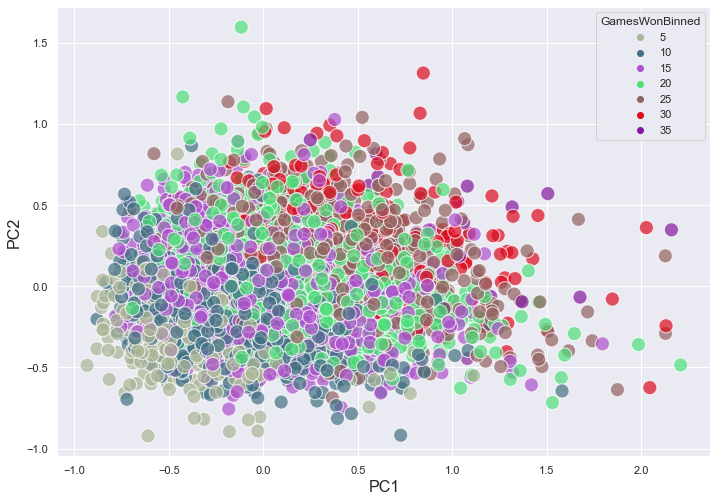

In [224]:
import random
import seaborn as sns

# Bin GamesWon for visualization
bins = [-1, 5, 10, 15, 20, 25, 30, 35]
principalDf["GamesWonBinned"] = pd.cut(principalDf["GamesWon"], bins=bins, labels=bins[1:])

colors = []
n = len(bins) - 1
random.seed(35)
for i in range(n):
    colors.append('#%06X' % random.randint(0, 0xFFFFFF))

sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.scatterplot(data=principalDf, x="pc1", y = "pc2", hue="GamesWonBinned", palette=colors, s=200, alpha=0.7)

ax.set_xlabel("PC1", size=16)
ax.set_ylabel("PC2", size=16)

plt.show()

In [219]:
principalDf

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0     0.188969  0.186831  0.130358 -0.177768  0.065312 -0.023417  0.019892   
1    -0.062136  0.249601 -0.003814  0.061009  0.126901 -0.145895  0.015160   
2     1.100582 -0.317961 -0.015220  0.035032  0.239620 -0.043484 -0.078070   
3     0.128197 -0.178031  0.071198 -0.044206  0.296367 -0.106739 -0.018151   
4     0.261384 -0.342857  0.056957 -0.024383  0.251929 -0.026962 -0.072707   
...        ...       ...       ...       ...       ...       ...       ...   
7250 -0.486852 -0.060082  0.212784 -0.043092  0.090755 -0.043298  0.065563   
7251 -0.100732 -0.105734 -0.426317  0.247919  0.133824 -0.002448 -0.024231   
7252 -0.482692  0.141673  0.300715 -0.198427  0.023780 -0.083994  0.034941   
7253  0.245027 -0.188042 -0.088843  0.020560 -0.189347  0.065082  0.028825   
7254 -0.011919 -0.317587 -0.348854 -0.001313 -0.002312  0.040357 -0.042720   

      HighDay  GamesWon  TeamID GamesWonBinned  
0           1        17    1104             20  
1           4        17    1104             20  
2           1        23    1104             25  
3           2        17    1104             20  
4          -1        20    1104             20  
...       ...       ...     ...            ...  
7250       -1        15    1474             15  
7251       -1        13    1476             15  
7252       -1        13    1475             15  
7253       -1        12    1477             15  
7254       -1         8    1473             10  

[7255 rows x 11 columns]

In [243]:
stats04 = df.loc[df["Season"] == 2004, ratStats]
wins04 = df.loc[df["Season"] == 2004, "GamesWon"]

reg = LassoCV().fit(stats04, wins04)

yPred = reg.predict(stats04)

mse = mean_squared_error(y_true=wins04, y_pred = yPred)
print(mse)

3.842053691717738


In [245]:
reg = LassoCV().fit(seasonRatDat, seasonWinDat)

yPred = reg.predict(seasonRatDat)

mse = mean_squared_error(y_true=seasonWinDat, y_pred = yPred)
print(mse)

5.162611198486795


In [239]:
seasonWinDat

1       17
2       17
3       23
4       17
5       20
        ..
7644    15
7665    13
7686    13
7707    12
7728     8
Name: GamesWon, Length: 7255, dtype: int64

In [249]:
df = df.drop("Unnamed: 0", axis=1)


In [252]:
df[ratStats]

RATScore    RATFGM    RATFGA   RATFGM3   RATFGA3    RATFTM    RATFTA  \
1     1.065934  1.033794  1.030245  1.000000  1.037313  1.223529  1.220833   
2     1.070552  1.069630  0.983354  0.981043  0.892562  1.121519  1.122124   
3     1.163496  1.052559  0.884163  1.065116  0.978333  1.802817  1.597254   
4     1.042116  0.984765  0.911098  0.720721  0.753600  1.590747  1.547677   
5     1.069353  1.014981  0.923077  0.930233  0.773181  1.438486  1.396963   
...        ...       ...       ...       ...       ...       ...       ...   
7644  1.001324  0.906949  0.969298  1.153191  1.169670  1.375375  1.366379   
7665  0.939394  0.902760  0.891218  0.907631  0.901389  1.126100  1.051975   
7686  0.987871  1.010652  1.058964  1.173729  1.129851  0.827869  0.875923   
7707  0.952000  0.980838  1.015109  1.216590  1.325321  0.735656  0.756637   
7728  0.888939  0.890863  0.949056  0.842520  0.819695  0.912234  0.863720   

         RATOR     RATDR    RATAst     RATTO    RATStl    RATBlk     RATPF  
1     1.245902  1.056782  1.036697  0.958763  1.193548  1.191011  0.936920  
2     0.982036  1.085803  1.045593  0.987179  1.289655  0.909091  0.909402  
3     0.887283  1.308072  1.121622  1.091954  0.891429  2.111111  0.741611  
4     1.025424  1.195286  0.910026  1.149560  0.943590  1.158730  0.746741  
5     0.981043  1.205521  0.916667  1.142857  0.772321  1.314516  0.779174  
...        ...       ...       ...       ...       ...       ...       ...  
7644  1.172996  1.015299  0.956098  1.151613  0.917526  0.544000  0.921905  
7665  0.519164  0.924761  0.856115  0.992248  1.000000  0.965909  0.920892  
7686  1.369863  1.040462  0.954054  1.080838  1.084270  0.532258  1.007449  
7707  0.923077  0.917120  1.062350  1.069892  0.868293  1.314286  1.151631  
7728  0.720000  0.899729  0.743056  1.080925  0.810427  1.125000  1.057778  

[7255 rows x 14 columns]